# Промышленность — задача проекта

### Описание проекта
На металлургическом комбинате ООО «Так закаляем сталь» сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Цель проекта
Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Требуется построить модель, которая предскажет температуру стали.

### План проекта
1. Подготовка данных:
   * Импорт необходимых библиотек;
   * Чтение файлов и сохранение полученных данных в переменные;
   * Получение общей информации о таблицах (head, info, describe);
   * Корректировка наименований столбцов (при необходимости);
   * Выводы.


2. Анализ данных:
    * Графическое представление данных из таблиц;
    * Проверка данных на аномалии;
    * Выводы.


3. Предобработка данных:
    * Корректировка типов данных (при необходимости);
    * Заполнение пропусков / удаление дубликатов (при наличии);
    * Выделение признаков и таргета;
    * Соединение таблиц;
    * Выводы.


4. Исследование итоговой таблицы с данными:
    * Аналитический анализ;
    * Графический анализ;
    * Корреляционный анализ;
    * Выводы.


5. Обучение модели:
    * Разделение данных на обучающую и тестовую выборки;
    * Масштабирование данных;
    * Обучение модели случайного леса с перебором гиперпараметров;
    * Обучение модели линейной регрессии;
    * Обучение модели градиентного бустинга с перебором гиперпараметров;
    * Построение константной модели;
    * Выбор лучшей модели;
    * Выводы.


6. Проверка моделей
    * Тестирование лучшей модели на тестовой выборке;
    * Если MAE на тестовых данных > 6.8 - доработка модели;
    * Анализ важности факторов;
    * Выводы.


7. Общий вывод


### Описание данных
Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.


## 1. Подготовка данных

Загрузим данные.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
try:
    data_arc_new = pd.read_csv('/datasets/data_arc_new.csv')
    data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
    data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
    data_gas_new = pd.read_csv('/datasets/data_gas_new.csv')
    data_temp_new = pd.read_csv('/datasets/data_temp_new.csv')
    data_wire_new = pd.read_csv('/datasets/data_wire_new.csv')
    data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')
except:
    data_arc_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_arc_new.csv')
    data_bulk_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_new.csv')
    data_bulk_time_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_time_new.csv')
    data_gas_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_gas_new.csv')
    data_temp_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_temp_new.csv')
    data_wire_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_new.csv')
    data_wire_time_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_time_new.csv')

Напишем функцию для вывода информации таблиц.

In [3]:
def information_output(data):
    print(data.head(15))
    print()
    print('__________________________________________________')
    print()
    print(data.describe())
    print()
    print('__________________________________________________')
    print()
    print(data.info())

Данные об электродах.

In [4]:
information_output(data_arc_new)

    key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0     1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1     1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2     1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3     1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4     1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   
5     2  2019-05-03 11:34:14  2019-05-03 11:36:31           0.381124   
6     2  2019-05-03 11:38:50  2019-05-03 11:44:28           0.261665   
7     2  2019-05-03 11:46:19  2019-05-03 11:48:25           0.710297   
8     2  2019-05-03 11:49:48  2019-05-03 11:53:18           0.786322   
9     3  2019-05-03 12:06:54  2019-05-03 12:11:34           1.101678   
10    3  2019-05-03 12:13:52  2019-05-03 12:15:56           0.542675   
11    3  2019-05-03 12:18:56  2019-05-03 12:20:45           0.774632   
12    3  2019-05-03 12:25:43  2019-05-03 12:27:00           1.22

Переименуем столбцы в таблице data_arc_new.

In [5]:
data_arc_new = data_arc_new.rename(columns = {"Начало нагрева дугой":"start_of_arc_heating",
                                              "Конец нагрева дугой":"end_of_arc_heating",
                                              "Активная мощность":"active_power",
                                              "Реактивная мощность":"reactive_power" })

Данные о подаче сыпучих материалов (объём).

In [6]:
information_output(data_bulk_new)

    key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0     1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1     2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2     3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3     4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4     5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   
5     6     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
6     7     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
7     8     NaN     NaN     NaN    99.0     NaN     NaN     NaN     NaN   
8     9     NaN     NaN     NaN   117.0     NaN     NaN     NaN     NaN   
9    10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
10   11     NaN     NaN     NaN    69.0     NaN     NaN     NaN     NaN   
11   12    46.0     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
12   13     NaN     NaN  

Переименуем столбцы в таблице data_bulk_new.

In [7]:
data_bulk_new = data_bulk_new.rename(columns={ "Bulk 1":"bulk_1",
                           "Bulk 2":"bulk_2",
                           "Bulk 3":"bulk_3",
                           "Bulk 4":"bulk_4",
                           "Bulk 5":"bulk_5",
                           "Bulk 6":"bulk_6",
                           "Bulk 7":"bulk_7",
                           "Bulk 8":"bulk_8",
                           "Bulk 9":"bulk_9",
                           "Bulk 10":"bulk_10",
                           "Bulk 11":"bulk_11",
                           "Bulk 12":"bulk_12",
                           "Bulk 13":"bulk_13",
                           "Bulk 14":"bulk_14",
                           "Bulk 15":"bulk_15",
})

Данные о подаче сыпучих материалов (время).

In [8]:
information_output(data_bulk_time_new)

    key               Bulk 1 Bulk 2               Bulk 3               Bulk 4  \
0     1                  NaN    NaN                  NaN  2019-05-03 11:28:48   
1     2                  NaN    NaN                  NaN  2019-05-03 11:36:50   
2     3                  NaN    NaN                  NaN  2019-05-03 12:32:39   
3     4                  NaN    NaN                  NaN  2019-05-03 12:43:22   
4     5                  NaN    NaN                  NaN  2019-05-03 13:30:47   
5     6                  NaN    NaN                  NaN  2019-05-03 13:57:27   
6     7                  NaN    NaN                  NaN  2019-05-03 14:18:58   
7     8                  NaN    NaN                  NaN  2019-05-03 15:17:58   
8     9                  NaN    NaN                  NaN  2019-05-03 16:03:08   
9    10                  NaN    NaN                  NaN                  NaN   
10   11                  NaN    NaN                  NaN  2019-05-03 17:32:23   
11   12  2019-05-03 17:42:46

Данные о продувке сплава газом.

In [9]:
information_output(data_gas_new)

    key      Газ 1
0     1  29.749986
1     2  12.555561
2     3  28.554793
3     4  18.841219
4     5   5.413692
5     6  11.273392
6     7   9.836267
7     8  15.171553
8     9   8.216623
9    10   6.529891
10   11   3.639128
11   12  11.026259
12   13  11.443643
13   14   5.098945
14   15  11.085451

__________________________________________________

               key        Газ 1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040

__________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 

Переименуем столбец в таблице data_gas_new.

In [10]:
data_gas_new = data_gas_new.rename(columns={"Газ 1": "gas_volume"})
data_gas_new

,key,gas_volume
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103


Результаты измерения температуры.

In [11]:
information_output(data_temp_new)

    key         Время замера  Температура
0     1  2019-05-03 11:02:04       1571.0
1     1  2019-05-03 11:07:18       1604.0
2     1  2019-05-03 11:11:34       1618.0
3     1  2019-05-03 11:18:04       1601.0
4     1  2019-05-03 11:25:59       1606.0
5     1  2019-05-03 11:30:38       1613.0
6     2  2019-05-03 11:34:04       1581.0
7     2  2019-05-03 11:38:40       1577.0
8     2  2019-05-03 11:46:09       1589.0
9     2  2019-05-03 11:49:38       1604.0
10    2  2019-05-03 11:55:09       1602.0
11    3  2019-05-03 12:06:44       1596.0
12    3  2019-05-03 12:13:42       1597.0
13    3  2019-05-03 12:18:46       1598.0
14    3  2019-05-03 12:25:33       1599.0

__________________________________________________

                key   Температура
count  18092.000000  14665.000000
mean    1616.460977   1590.722741
std      934.641385     20.394381
min        1.000000   1191.000000
25%      807.750000   1580.000000
50%     1618.000000   1590.000000
75%     2429.000000   1599.000000
max

Переименуем столбцы в таблице data_gas_new.

In [12]:
data_temp_new = data_temp_new.rename(columns={"Температура": "temperature","Время замера": "measurement_time"})
data_temp_new

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN


Данные о проволочных материалах (объём).

In [13]:
information_output(data_wire_new)

    key      Wire 1     Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  \
0     1   60.059998        NaN     NaN     NaN     NaN     NaN     NaN   
1     2   96.052315        NaN     NaN     NaN     NaN     NaN     NaN   
2     3   91.160157        NaN     NaN     NaN     NaN     NaN     NaN   
3     4   89.063515        NaN     NaN     NaN     NaN     NaN     NaN   
4     5   89.238236   9.114560     NaN     NaN     NaN     NaN     NaN   
5     6   99.109917   9.114560     NaN     NaN     NaN     NaN     NaN   
6     7   98.061600        NaN     NaN     NaN     NaN     NaN     NaN   
7     8  155.282394        NaN     NaN     NaN     NaN     NaN     NaN   
8     9  113.393279   9.143681     NaN     NaN     NaN     NaN     NaN   
9    10   81.244796  12.376000     NaN     NaN     NaN     NaN     NaN   
10   11   99.197281        NaN     NaN     NaN     NaN     NaN     NaN   
11   12  153.578873        NaN     NaN     NaN     NaN     NaN     NaN   
12   13   77.269920  52.416003     NaN

Переименуем столбцы в таблице data_wire_new.

In [14]:
data_wire_new = data_wire_new.rename(columns={
                           "Wire 1":"wire_1",
                           "Wire 2":"wire_2",
                           "Wire 3":"wire_3",
                           "Wire 4":"wire_4",
                           "Wire 5":"wire_5",
                           "Wire 6":"wire_6",
                           "Wire 7":"wire_7",
                           "Wire 8":"wire_8",
                           "Wire 9":"wire_9"})

Данные о проволочных материалах (время).

In [15]:
information_output(data_wire_time_new)

    key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0     1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN    NaN   
1     2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN    NaN   
2     3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN    NaN   
3     4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN    NaN   
4     5  2019-05-03 13:20:44  2019-05-03 13:15:34    NaN    NaN    NaN    NaN   
5     6  2019-05-03 13:57:27  2019-05-03 13:48:52    NaN    NaN    NaN    NaN   
6     7  2019-05-03 14:18:58                  NaN    NaN    NaN    NaN    NaN   
7     8  2019-05-03 15:01:30                  NaN    NaN    NaN    NaN    NaN   
8     9  2019-05-03 15:45:44  2019-05-03 15:39:37    NaN    NaN    NaN    NaN   
9    10  2019-05-03 16:27:00  2019-05-03 16:22:36    NaN    NaN    NaN    NaN   
10   11  2019-05-03 16:55:14                  NaN    NaN    NaN    NaN    NaN   
11   12  2019-05-03 17:42:46

**Вывод:**

На данном этапе подготовке данных было выполнено:
* Импорт необходимых библиотек;
* Чтение файлов и сохранение полученных данных в переменные;
* Получение общей информации о таблицах (head, info, describe);
* Корректировка наименований столбцов.

## 2. Анализ данных

Построим гистограммы для таблицы data_arc_new.

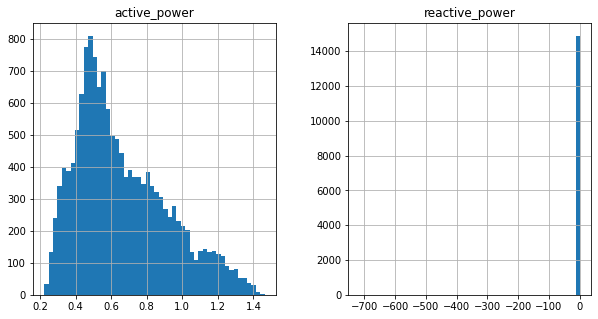

In [16]:
data_arc_new.drop(['key'], axis = 1).hist(bins = 50, figsize=(10,5));

Анализ таблицы data_arc_new показал, что в столбце "reactive_power" наблюдаются отрицательные значения, что является аномалией.

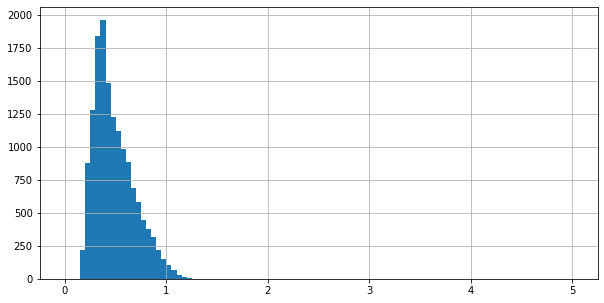

In [17]:
data_arc_new["reactive_power"].hist(bins = 100, figsize=(10,5),range = (0,5));

Построим гистограммы для каждого материала таблицы data_bulk_new.

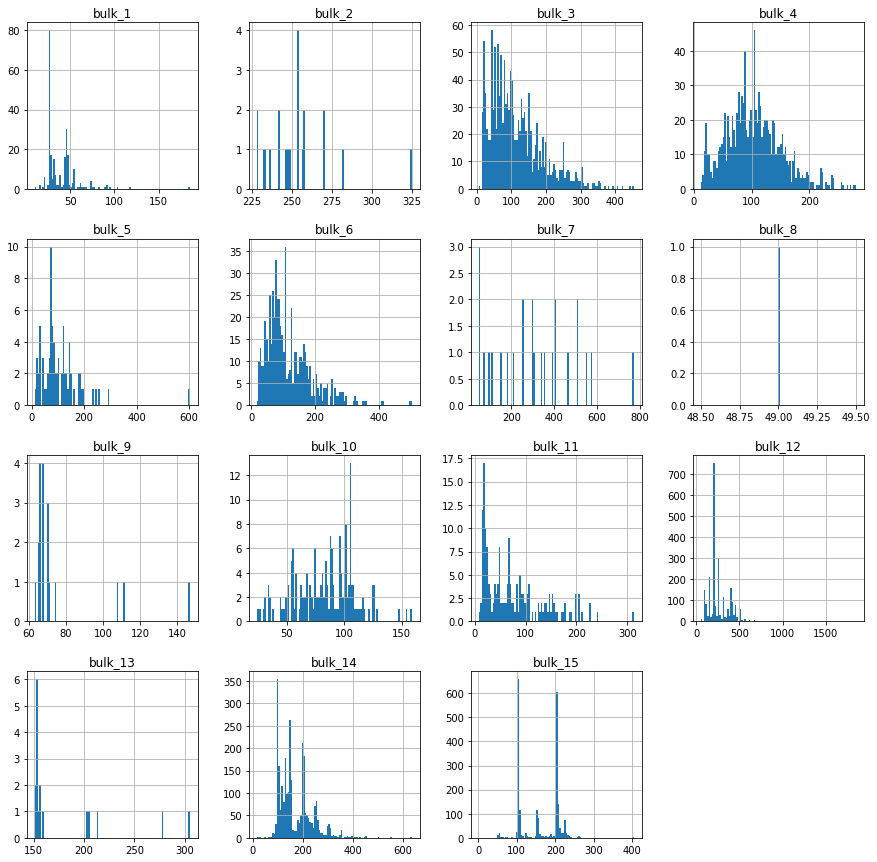

In [18]:
data_bulk_new.drop(['key'], axis = 1).hist(bins = 100, figsize=(15,15));

В таблице data_bulk_new замечены пропуски, что говорит о том, что материал не был добавлен. В дальнейшем можно будет заменить на 0. Также можно заметить, что некоторые материалы используются менее 10% от общего количества. В дальнейшем их можно будет объединить в одну группу.

Построим гистограмму для таблицы data_gas_new.

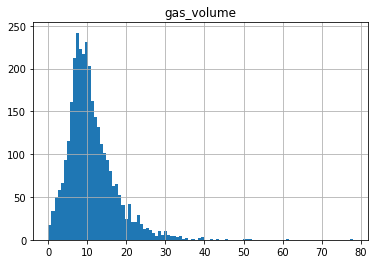

In [19]:
data_gas_new.drop(['key'], axis = 1).hist(bins=100);

Построим диаграмму "ящик с усами" для таблицы data_gas_new.

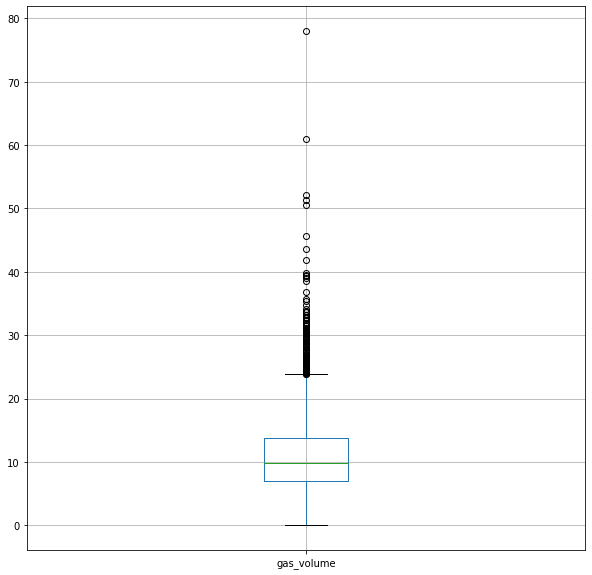

In [20]:
data_gas_new.boxplot('gas_volume', figsize = (10,10));

По данной диаграмме можно сделать вывод, что наблюдаются выбросы в столбце gas_volume, также видны явные аномалии свыше 60.

Построим гистограмму для таблицы data_temp_new.

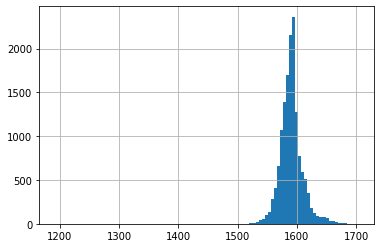

In [21]:
data_temp_new['temperature'].hist(bins=100);

Построим диаграмму "ящик с усами" для таблицы data_temp_new.

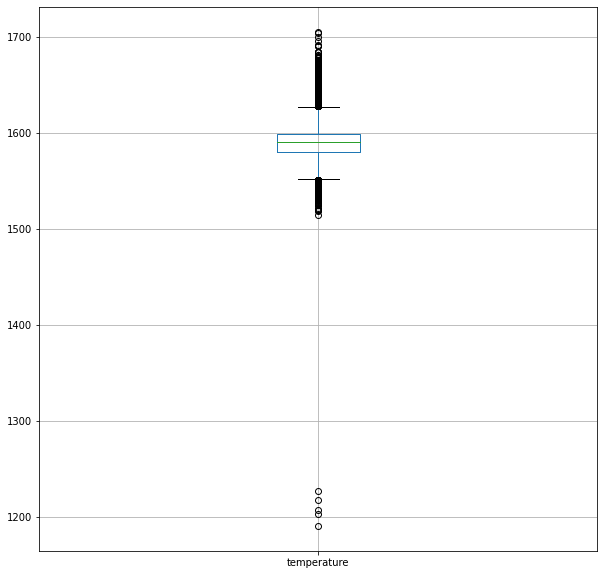

In [22]:
data_temp_new.boxplot('temperature', figsize = (10,10));

По данной диаграмме можно сделать вывод, что помимо выбросов наблюдаются аномальные значения ниже 1300.

В столбце "temperature" наблюдаются пропуски. Так как температура в данном проекте является целевым признаком, то необходимо будет удалить партии с пропущенными значениями по температуре.

Построим гистограммы для каждого материал таблицы data_wire_new.

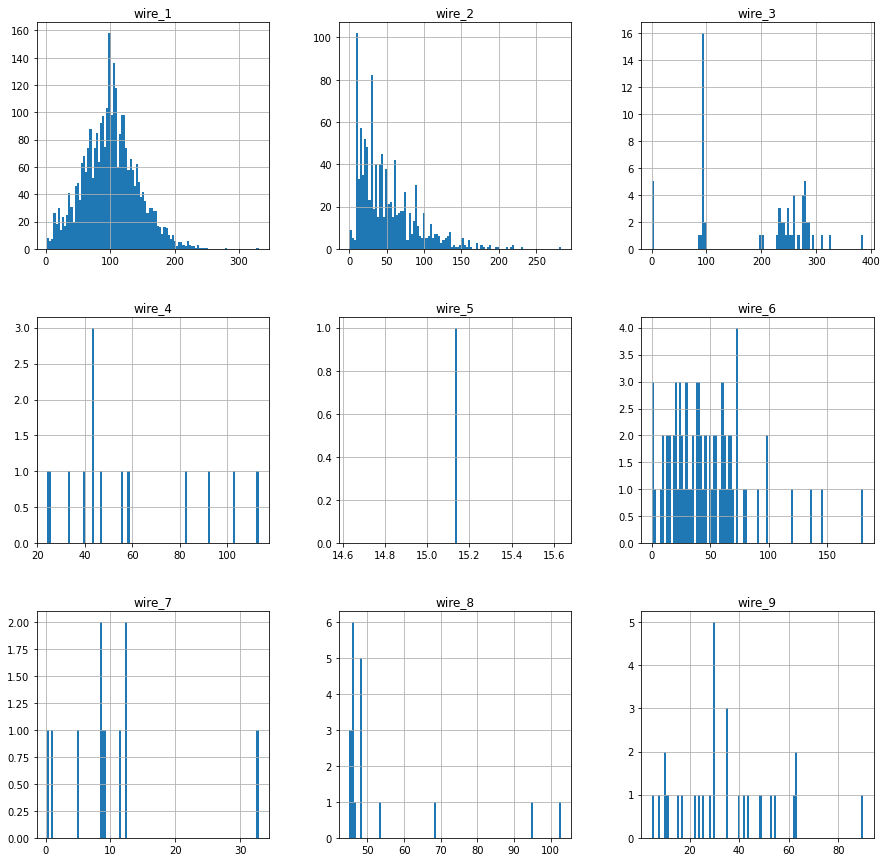

In [23]:
data_wire_new.drop(['key'], axis = 1).hist(bins = 100, figsize=(15,15));


В таблице data_wire_new замечены пропуски, что говорит о том, что материал не был добавлен. В дальнейшем можно будет заменить на 0. Также можно заметить, что некоторые материалы используются менее 10% от общего количества. В дальнейшем их можно будет объединить в одну группу.

**Вывод:**



Были изучены данные. 

В таблице data_arc_new столбце "reactive_power" наблюдаются отрицательные значения, что является аномалией. 

В таблицах data_bulk_new и data_wire_new замечены пропуски, что говорит о том, что материал не был добавлен. В дальнейшем можно будет заменить на 0. Также можно заметить, что некоторые материалы используются менее 10% от общего количества. В дальнейшем их можно будет объединить в одну группу.

По диаграмме "ящик с усами" для таблицы data_gas_new можно сделать вывод, что наблюдаются выбросы в столбце gas_volume.


"Ящик с усами" для таблицы data_temp_new показал, что помимо выбросов наблюдаются аномальные значения ниже 1300. Также в столбце "temperature" в таблице data_temp_new наблюдаются пропуски. Так как температура в данном проекте является целевым признаком, то необходимо будет удалить стороки с пропущенными значениями в этом столбце.

В данной задаче требуется построить модель, которая предскажет температуру стали, следовательно, решается задача регрессии. В проекте хочется рассмотреть модели случайного леса, линейной регрессии и модель с использованием градиентного бустинга.

Для построения модели нам понадобится таблица со следующими столбцами:

* Полная мощность;
* Время, в течение которого подогревали в секундах;
* Начальная температура;
* Продувка сплава газом;
* Столбцы с материалами, которые были добавлены;
* Конечная температура.

## 3. Предобработка данных

В таблице data_arc_new удалим аномалии в столбце reactive_power.

In [24]:
data_arc_new = data_arc_new.loc[data_arc_new['reactive_power'] >= 0]
data_arc_new

,key,start_of_arc_heating,end_of_arc_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543


В таблице data_arc_new посчитаем общую мощность и время нагрева для каждой строки.

In [25]:
data_arc_new['full_power'] = (data_arc_new['active_power'] ** 2 + data_arc_new['reactive_power'] ** 2) ** 0.5
data_arc_new['start_of_arc_heating'] = pd.to_datetime(data_arc_new['start_of_arc_heating'])
data_arc_new['end_of_arc_heating'] = pd.to_datetime(data_arc_new['end_of_arc_heating'])
data_arc_new['heating_time'] = (data_arc_new['end_of_arc_heating'] - data_arc_new['start_of_arc_heating']).dt.seconds
data_arc_new

,key,start_of_arc_heating,end_of_arc_heating,active_power,reactive_power,full_power,heating_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148
...,...,...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579,0.532085,157
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240,0.792429,180
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302,1.293389,184
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543,0.641792,57


Получим суммарные значения общую мощность и время нагрева для каждой партии.

In [26]:
table1 = data_arc_new.pivot_table(index = ['key'], values = ['full_power','heating_time'], aggfunc = 'sum')
table1

,full_power,heating_time
key,,
1,3.718736,1098
2,2.588349,811
3,5.019223,655
4,3.400038,741
5,2.816980,869
...,...,...
3237,3.250657,909
3238,1.723937,546
3239,6.014480,1216


Удалим партии, в которых есть пропущенные значения и аномалии по температуре в таблице data_temp_new.

In [27]:
drop_index = data_temp_new.loc[(data_temp_new['temperature'].isna()) | (data_temp_new['temperature'] < 1300)]['key'].unique()
data_temp_new = data_temp_new.query('key not in @drop_index')

Для каждой партии получим первую и последнюю температуру при времени измерения.

In [28]:
table2 = data_temp_new.pivot_table(index = ['key'], values = ['temperature'], aggfunc = ['first','last'])
table2.columns = ['initial_temperature','final_temperature']

table2

,initial_temperature,final_temperature
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
2495,1570.0,1591.0
2496,1554.0,1591.0
2497,1571.0,1589.0


Соединим получившиеся таблицы по номеру партии.

In [29]:
data = table1.merge(table2, on = 'key', how = 'inner')
data

,full_power,heating_time,initial_temperature,final_temperature
key,,,,
1,3.718736,1098,1571.0,1613.0
2,2.588349,811,1581.0,1602.0
3,5.019223,655,1596.0,1599.0
4,3.400038,741,1601.0,1625.0
5,2.816980,869,1576.0,1602.0
...,...,...,...,...
2495,3.868721,723,1570.0,1591.0
2496,5.070316,940,1554.0,1591.0
2497,4.360918,569,1571.0,1589.0


Добавим data_gas_new к получившейся таблице по номеру партии.

In [30]:
data = data.merge(data_gas_new, on = 'key', how = 'inner')
data

,key,full_power,heating_time,initial_temperature,final_temperature,gas_volume
0,1,3.718736,1098,1571.0,1613.0,29.749986
1,2,2.588349,811,1581.0,1602.0,12.555561
2,3,5.019223,655,1596.0,1599.0,28.554793
3,4,3.400038,741,1601.0,1625.0,18.841219
4,5,2.816980,869,1576.0,1602.0,5.413692
...,...,...,...,...,...,...
2464,2495,3.868721,723,1570.0,1591.0,7.125735
2465,2496,5.070316,940,1554.0,1591.0,9.412616
2466,2497,4.360918,569,1571.0,1589.0,6.271699
2467,2498,3.909917,750,1591.0,1594.0,14.953657


Заполним пропуски в таблице data_bulk_new нулевыми значениями.

In [31]:
data_bulk_new = data_bulk_new.fillna(0)

Материалы, которые использовались меньше 10%, объединим в один столбец.

In [32]:
data_bulk_new['bulk_other'] = data_bulk_new['bulk_1'] + data_bulk_new['bulk_2'] + data_bulk_new['bulk_5'] + \
data_bulk_new['bulk_7'] + data_bulk_new['bulk_8'] + data_bulk_new['bulk_9'] + data_bulk_new['bulk_10'] + \
data_bulk_new['bulk_11'] + data_bulk_new['bulk_13']

data_bulk_new = data_bulk_new.drop(['bulk_1','bulk_2','bulk_5','bulk_7','bulk_8','bulk_9','bulk_10','bulk_11','bulk_13'],axis=1)

Добавим data_bulk_new к получившейся таблице по номеру партии.

In [33]:
data = data.merge(data_bulk_new, on = 'key', how = 'inner')
data

,key,full_power,heating_time,initial_temperature,final_temperature,gas_volume,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,bulk_other
0,1,3.718736,1098,1571.0,1613.0,29.749986,0.0,43.0,0.0,206.0,150.0,154.0,0.0
1,2,2.588349,811,1581.0,1602.0,12.555561,0.0,73.0,0.0,206.0,149.0,154.0,0.0
2,3,5.019223,655,1596.0,1599.0,28.554793,0.0,34.0,0.0,205.0,152.0,153.0,0.0
3,4,3.400038,741,1601.0,1625.0,18.841219,0.0,81.0,0.0,207.0,153.0,154.0,0.0
4,5,2.816980,869,1576.0,1602.0,5.413692,0.0,78.0,0.0,203.0,151.0,152.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,2495,3.868721,723,1570.0,1591.0,7.125735,21.0,0.0,0.0,256.0,129.0,223.0,90.0
2397,2496,5.070316,940,1554.0,1591.0,9.412616,0.0,63.0,0.0,256.0,129.0,226.0,122.0
2398,2497,4.360918,569,1571.0,1589.0,6.271699,0.0,85.0,0.0,230.0,124.0,226.0,0.0
2399,2498,3.909917,750,1591.0,1594.0,14.953657,90.0,0.0,0.0,206.0,129.0,207.0,101.0


Заполним пропуски в таблице data_wire_new нулевыми значениями.

In [34]:
data_wire_new = data_wire_new.fillna(0)

Материалы, которые использовались меньше 10%, объединим в один столбец.

In [35]:
data_wire_new['wire_other'] = data_wire_new['wire_3'] + data_wire_new['wire_4'] + data_wire_new['wire_5'] + \
data_wire_new['wire_6'] + data_wire_new['wire_7'] + data_wire_new['wire_8'] + data_wire_new['wire_9'] 

data_wire_new = data_wire_new.drop(['wire_3','wire_4','wire_5','wire_6','wire_7','wire_8','wire_9'],axis=1)


Добавим data_wire_new к получившейся таблице по номеру партии.

In [36]:
data = data.merge(data_wire_new, on = 'key', how = 'inner')
data

,key,full_power,heating_time,initial_temperature,final_temperature,gas_volume,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,bulk_other,wire_1,wire_2,wire_other
0,1,3.718736,1098,1571.0,1613.0,29.749986,0.0,43.0,0.0,206.0,150.0,154.0,0.0,60.059998,0.00000,0.0
1,2,2.588349,811,1581.0,1602.0,12.555561,0.0,73.0,0.0,206.0,149.0,154.0,0.0,96.052315,0.00000,0.0
2,3,5.019223,655,1596.0,1599.0,28.554793,0.0,34.0,0.0,205.0,152.0,153.0,0.0,91.160157,0.00000,0.0
3,4,3.400038,741,1601.0,1625.0,18.841219,0.0,81.0,0.0,207.0,153.0,154.0,0.0,89.063515,0.00000,0.0
4,5,2.816980,869,1576.0,1602.0,5.413692,0.0,78.0,0.0,203.0,151.0,152.0,0.0,89.238236,9.11456,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2495,3.868721,723,1570.0,1591.0,7.125735,21.0,0.0,0.0,256.0,129.0,223.0,90.0,89.150879,0.00000,0.0
2321,2496,5.070316,940,1554.0,1591.0,9.412616,0.0,63.0,0.0,256.0,129.0,226.0,122.0,114.179527,0.00000,0.0
2322,2497,4.360918,569,1571.0,1589.0,6.271699,0.0,85.0,0.0,230.0,124.0,226.0,0.0,94.086723,9.04800,0.0
2323,2498,3.909917,750,1591.0,1594.0,14.953657,90.0,0.0,0.0,206.0,129.0,207.0,101.0,118.110717,0.00000,0.0


**Вывод:**



На данном этапе были:
* Удалены анамалии, заполнены пропуски.
* Материалы, которые использовались меньше 10%, объединили в один столбец.
* Cоеденены все таблицы в одну по номеру партии.

## 4. Исследование итоговой таблицы с данными

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  2325 non-null   int64  
 1   full_power           2325 non-null   float64
 2   heating_time         2325 non-null   int64  
 3   initial_temperature  2325 non-null   float64
 4   final_temperature    2325 non-null   float64
 5   gas_volume           2325 non-null   float64
 6   bulk_3               2325 non-null   float64
 7   bulk_4               2325 non-null   float64
 8   bulk_6               2325 non-null   float64
 9   bulk_12              2325 non-null   float64
 10  bulk_14              2325 non-null   float64
 11  bulk_15              2325 non-null   float64
 12  bulk_other           2325 non-null   float64
 13  wire_1               2325 non-null   float64
 14  wire_2               2325 non-null   float64
 15  wire_other           2325 non-null   f

In [38]:
data.describe()

,key,full_power,heating_time,initial_temperature,final_temperature,gas_volume,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,bulk_other,wire_1,wire_2,wire_other
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000
mean,1251.512258,3.885528,807.988387,1587.365161,1593.366022,11.378942,47.296774,37.331613,22.468817,208.507957,153.971613,120.026667,20.361290,102.412198,17.605637,5.163939
std,715.099053,1.517546,340.888430,23.623144,11.209581,6.395632,75.228262,58.670377,55.831097,157.137873,81.398153,84.674380,69.069182,43.535263,33.642919,32.876993
min,1.000000,0.331897,57.000000,1519.000000,1541.000000,0.008399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,629.000000,2.844193,581.000000,1571.000000,1587.000000,7.282948,0.000000,0.000000,0.000000,105.000000,105.000000,0.000000,0.000000,73.207679,0.000000,0.000000
50%,1255.000000,3.769823,778.000000,1587.000000,1593.000000,10.100950,0.000000,0.000000,0.000000,206.000000,149.000000,107.000000,0.000000,101.087998,0.000000,0.000000
75%,1868.000000,4.769421,993.000000,1603.000000,1598.000000,14.217691,80.000000,77.000000,0.000000,283.000000,204.000000,204.000000,0.000000,128.069763,23.102560,0.000000
max,2499.000000,15.288271,4189.000000,1660.000000,1653.000000,77.995040,454.000000,281.000000,503.000000,1849.000000,636.000000,405.000000,1187.000000,330.314424,282.780152,385.008668


По данным видно, что в таблице остались выбросы в столбце gas_volume. Удалим их после разделения  тренеровочной части.

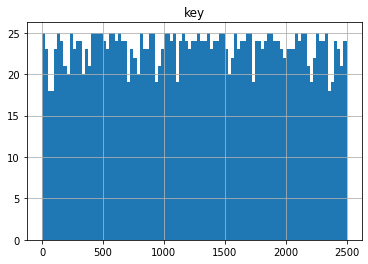

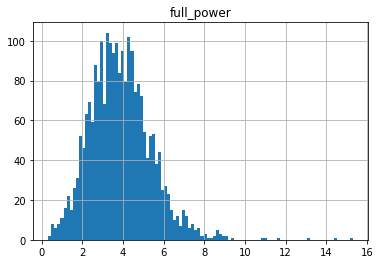

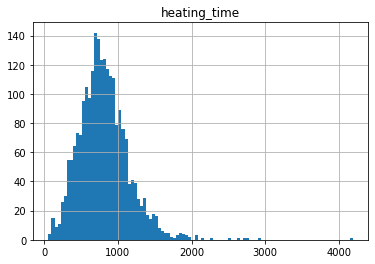

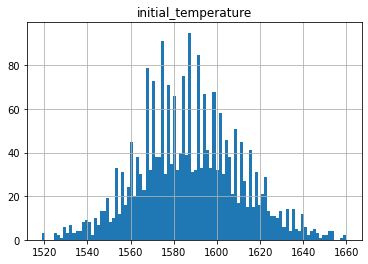

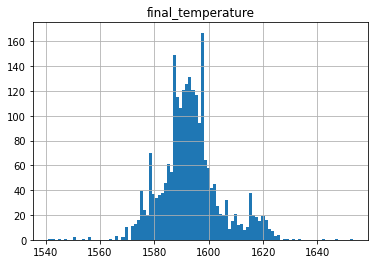

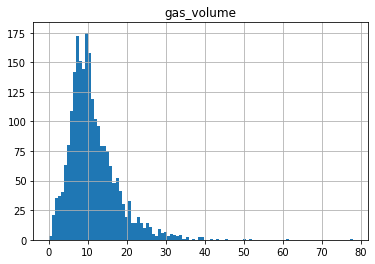

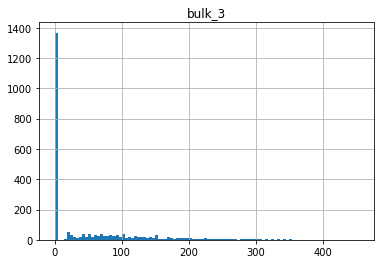

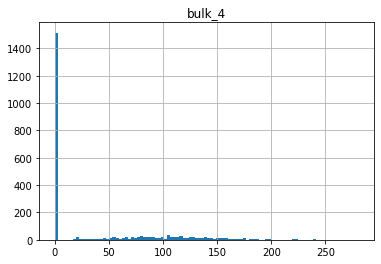

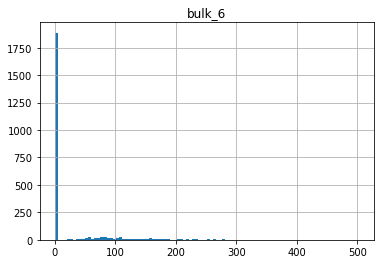

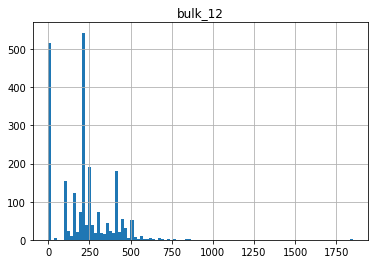

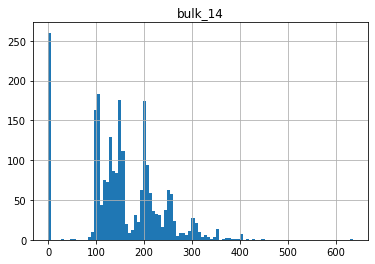

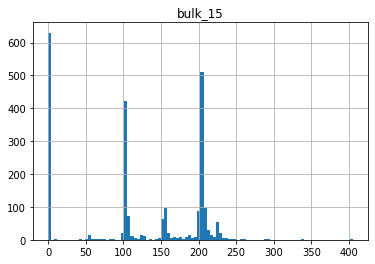

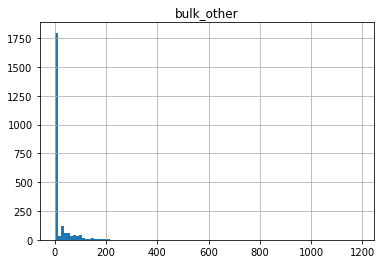

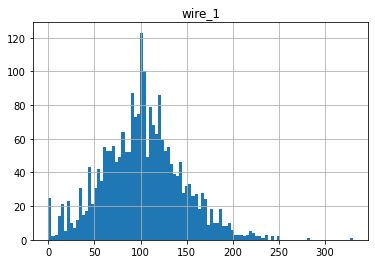

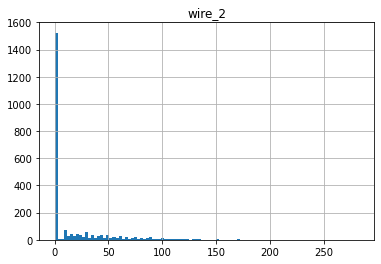

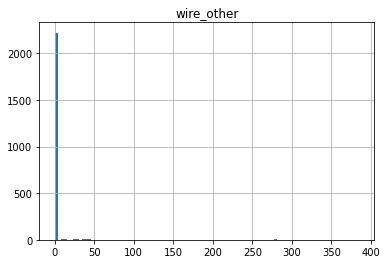

In [39]:
for column in data.columns:
    hist = data[column].hist(bins = 100);
    hist.set_title(column)
    plt.show()

Построим "ящик с усами" для столбца full_power.

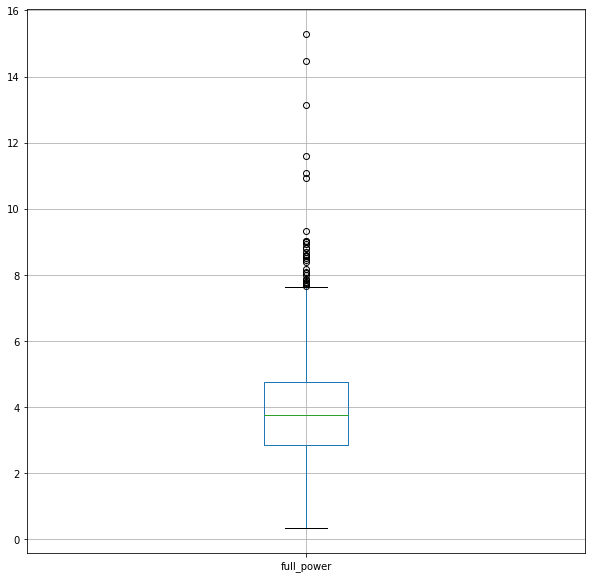

In [40]:
data.boxplot('full_power', figsize = (10,10));

В данном столбце full_power наблюдаются выбросы.

Построим "ящик с усами" для столбца heating_time.

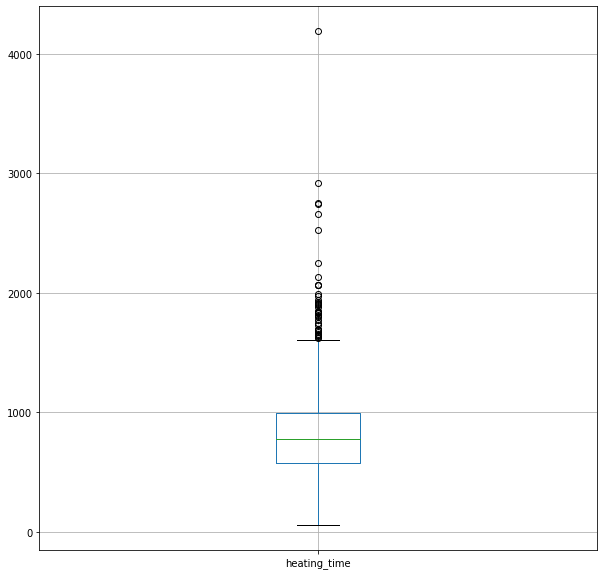

In [41]:
data.boxplot('heating_time', figsize = (10,10));

В данном столбце heating_time наблюдаются выбросы.

Построим корреляционную матрицу.

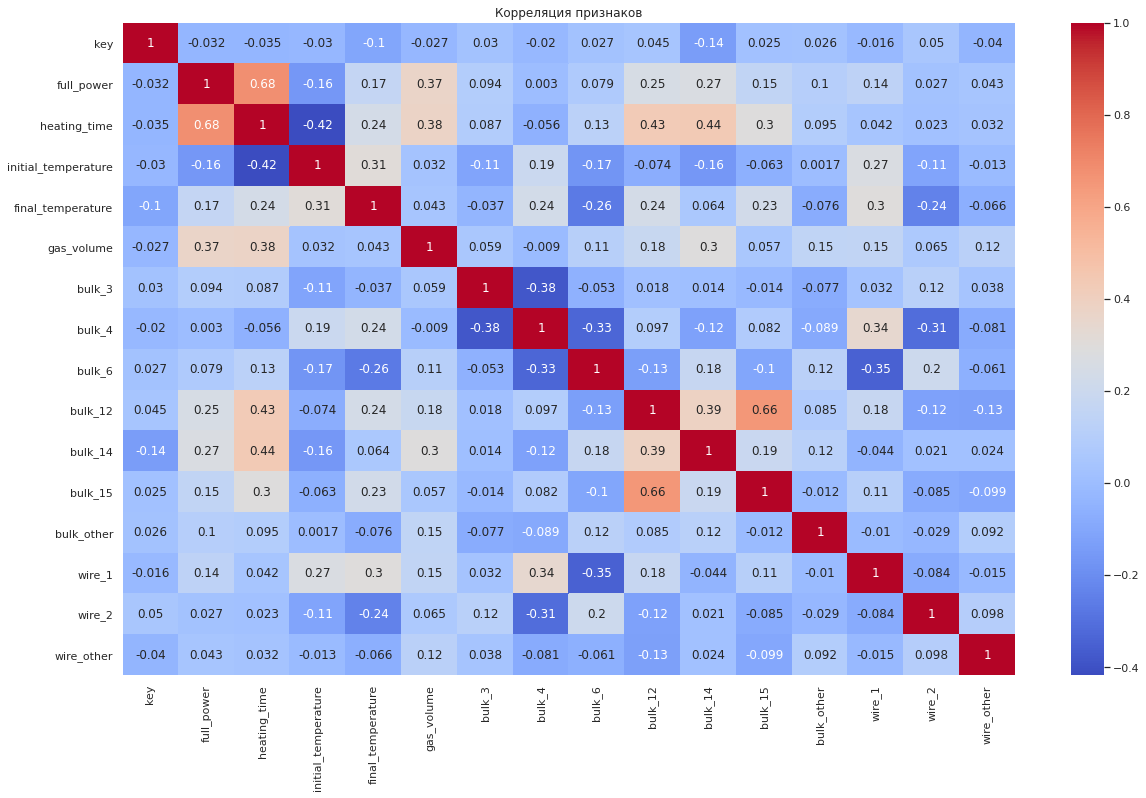

In [44]:
plt.figure(figsize=(20, 12))
plt.title('Корреляция признаков')
sns.heatmap(data.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.show()

По корреляционному анализу можем наблюдать, что есть связь между временем и мощностью нагревания. 
Также наблюдаются связи между материалами bulk_12 с bulk_14 и bulk_15, что может означать, что эти материалы добавляются совместно. Но так как у нас нет пар с корреляцией более 0.9, то ничего удалять не будем.

**Вывод:**

Было проведено исследование итоговой таблицы с данными. Исследование показало наличие выбросов в столбцах gas_volume, full_power и heating_time, которые можно будет удалить в дальнейшем в тренеровочной части данных. Корреляционный анализ показал, что есть связь между временем и мощностью нагревания. Также наблюдаются связи между материалами bulk_12 с bulk_14 и bulk_15, что может означать, что эти материалы добавляются совместно. Но так как у нас нет пар с корреляцией более 0.9, то ничего удаляем.

## 5. Обучение модели

In [45]:
features = data.drop(['key','final_temperature'],axis=1)
target = data['final_temperature']

In [46]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state = 240423)

Удалим из тренировочной части выбросы в столбцах gas_volume, full_power и heating_time.

In [47]:
features_train = features_train.query('gas_volume < 50 & full_power < 10 & heating_time < 2000')
target_train = target_train[features_train.index]

Масштабируем данные.

In [48]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)
features_train

array([[ 1.17041249, -0.30283837,  0.45252646, ...,  1.80665219,
        -0.51996922, -0.14535355],
       [-0.38177504,  0.55155592, -1.4221909 , ...,  0.59722085,
         2.73264773,  9.62668239],
       [-0.40049494, -1.00683367,  1.43249235, ..., -0.26448515,
        -0.51996922, -0.14535355],
       ...,
       [ 0.96867375,  0.3147575 , -1.59261975, ...,  1.19704661,
        -0.51996922, -0.14535355],
       [-0.90177002,  0.03315939, -0.27179615, ..., -0.17385943,
        -0.51996922, -0.14535355],
       [ 1.60346758, -0.40843766,  0.79338416, ..., -0.38278417,
        -0.15475039, -0.14535355]])

Построим модель с использованием алгоритма случайного леса.

In [49]:
model = RandomForestRegressor(random_state = 240423)
params = {'max_depth':np.arange(1,20),
         'n_estimators':np.arange(20, 150, 10)}
search_RandomForestRegressor = RandomizedSearchCV(estimator = model, param_distributions = params, cv = 3, scoring = 'neg_mean_absolute_error')
search_RandomForestRegressor.fit(features_train,target_train)
best_model_search_RandomForestRegressor = search_RandomForestRegressor.best_estimator_
print(search_RandomForestRegressor.best_estimator_)
print(search_RandomForestRegressor.best_score_)

RandomForestRegressor(max_depth=15, n_estimators=130, random_state=240423)
-6.306346697785631


Построим модель с использованием линейной регрессии.

In [50]:
model_LinearRegression = LinearRegression()
model_LinearRegression_score = cross_val_score(model_LinearRegression,features_train, target_train, cv = 3, scoring = 'neg_mean_absolute_error').mean()
model_LinearRegression_score

-6.333036521827158

Построим модель с использованием бустинга LightGBM.

In [51]:
model = LGBMRegressor(random_state = 240423)
params = {'max_depth':np.arange(5,20),
         'n_estimators':np.arange(20, 150, 10)}
search_LGBMRegressor = GridSearchCV(estimator = model, param_grid = params, cv = 3, scoring = 'neg_mean_absolute_error')
search_LGBMRegressor.fit(features_train,target_train)
best_model_search_LGBMRegressor = search_LGBMRegressor.best_estimator_
print(search_LGBMRegressor.best_estimator_)
print(search_LGBMRegressor.best_score_)

LGBMRegressor(max_depth=5, n_estimators=60, random_state=240423)
-6.205963148291985


Построим константную модель для сравнения результата.

In [52]:
model_DummyRegressor = DummyRegressor(strategy="mean")
model_DummyRegressor_score = cross_val_score(model_DummyRegressor,features_train, target_train, cv = 3, scoring = 'neg_mean_absolute_error').mean()
model_DummyRegressor_score

-8.038948626343155

In [53]:
pd.DataFrame({'Модель':[best_model_search_RandomForestRegressor,model_LinearRegression,best_model_search_LGBMRegressor,model_DummyRegressor],'best_score':[search_RandomForestRegressor.best_score_,model_LinearRegression_score,search_LGBMRegressor.best_score_,model_DummyRegressor_score]})

,Модель,best_score
0,"(DecisionTreeRegressor(max_depth=15, max_featu...",-6.306347
1,LinearRegression(),-6.333037
2,"LGBMRegressor(max_depth=5, n_estimators=60, ra...",-6.205963
3,DummyRegressor(),-8.038949


**Вывод:**



Наилучший результат по метрике MAE показала модель LGBMRegressor(max_depth=5, n_estimators=60, random_state=240423).

## 6. Проверка моделей

Проверим модель LGBMRegressor(max_depth=5, n_estimators=60, random_state=240423) на тестовых данных

In [54]:
predictions = best_model_search_LGBMRegressor.predict(features_test)
mean_absolute_error(target_test, predictions)

6.287752935688193

Построим диаграмму для анализа важности факторов.

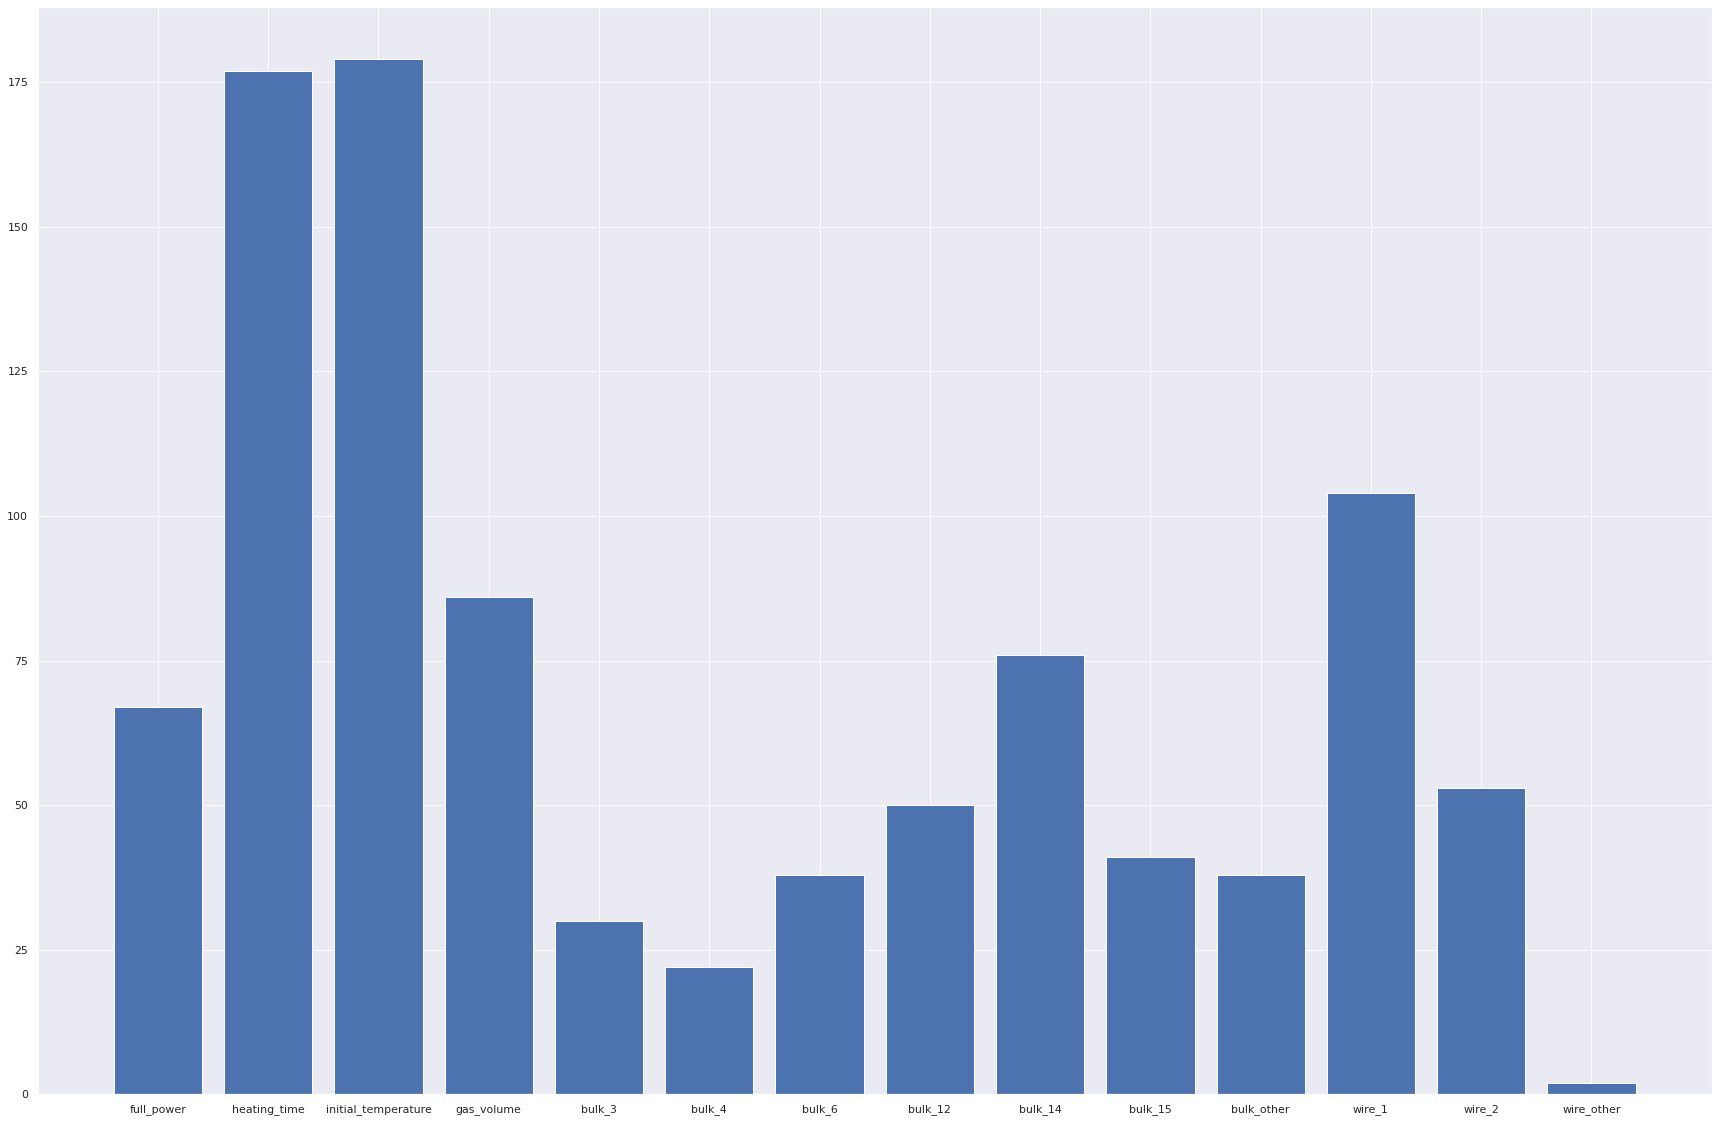

In [55]:
plt.bar(features.columns,best_model_search_LGBMRegressor.feature_importances_);

По диаграмме можно сделать вывод, что наиболее значительными признаками в данной модели являются начальная температура и время нагрева.

**Вывод:**



Модель LGBMRegressor(max_depth=5, n_estimators=60, random_state=240423) показала хороший результат 6.29 (< 6.8 по условиям задачи). Анализ важности факторов показал, что наиболее значительными признаками в данной модели являются начальная температура, время нагрева и подача газа.

## 7. Общий вывод

1. Подготовка данных.

    На этапе подготовке данных было выполнено:
    * Импорт необходимых библиотек;
    * Чтение файлов и сохранение полученных данных в переменные;
    * Получение общей информации о таблицах (head, info, describe);
    * Корректировка наименований столбцов.
    

2. Анализ данных

    Были изучены данные.

    В таблице data_arc_new столбце "reactive_power" наблюдаются отрицательные значения, что является аномалией.

    В таблицах data_bulk_new и data_wire_new замечены пропуски, что говорит о том, что материал не был добавлен. Пропуски заменить на 0. Также можно заметить, что некоторые материалы используются менее 10% от общего количества, следовательно, их можно будет объединить в одну группу.

    По диаграмме "ящик с усами" для таблицы data_gas_new можно сделать вывод, что наблюдаются выбросы в столбце gas_volume.

    "Ящик с усами" для таблицы data_temp_new показал, что помимо выбросов наблюдаются аномальные значения ниже 1300. Также в столбце "temperature" в таблице data_temp_new наблюдаются пропуски. Так как температура в данном проекте является целевым признаком, то необходимо будет удалить стороки с пропущенными значениями в этом столбце.

    В данной задаче требуется построить модель, которая предскажет температуру стали, следовательно, решается задача регрессии. Принято решение рассмотреть в проекте модели случайного леса, линейной регрессии и модель с использованием градиентного бустинга.

    Для построения модели понадобится таблица со следующими столбцами:

   *  Полная мощность;
   * Время, в течение которого подогревали в секундах;
   * Начальная температура;
   * Продувка сплава газом;
   * Столбцы с материалами, которые были добавлены;
   * Конечная температура.

3. Предобработка данных

    На данном этапе были:

    * Удалены анамалии, заполнены пропуски.
    * Материалы, которые использовались меньше 10%, объединили в один столбец.
    * Cоеденены все таблицы в одну по номеру партии.

4. Исследование итоговой таблицы с данными

    Было проведено исследование итоговой таблицы с данными. Исследование показало наличие выбросов в столбцах gas_volume, full_power и heating_time, которые можно будет удалить в дальнейшем в тренеровочной части данных. Корреляционный анализ показал, что есть связь между временем и мощностью нагревания. Также наблюдаются связи между материалами bulk_12 с bulk_14 и bulk_15, что может означать, что эти материалы добавляются совместно. Но так как у нас нет пар с корреляцией более 0.9, то ничего удаляем.
    

5. Обучение модели

    Наилучший результат по метрике MAE показала модель LGBMRegressor(max_depth=5, n_estimators=60, random_state=240423).
    

6. Проверка моделей

    Модель LGBMRegressor(max_depth=5, n_estimators=60, random_state=240423) показала хороший результат 6.29 (< 6.8 по условиям задачи). Анализ важности факторов показал, что наиболее значительными признаками в данной модели являются начальная температура, время нагрева и подача газа.
